# <center> Survival Analysis of Clinical Data</center>

### <center> Submission by Arul Prakash Pugazhendi </center>

In [3]:
dir()

[1] "CRC_226_GSE14333.RData"  "Survival Analysis.ipynb"

In [4]:
load("CRC_226_GSE14333.RData")

In [5]:
str(clinical_data)

'data.frame':	226 obs. of  9 variables:
 $ sampleID   : chr  "GSM358341" "GSM358342" "GSM358343" "GSM358344" ...
 $ location   : Factor w/ 4 levels "Rectum","Colon",..: 4 1 3 3 3 4 3 3 4 4 ...
 $ dukes_stage: Factor w/ 3 levels "A","B","C": 1 1 1 1 1 1 1 1 1 1 ...
 $ age_diag   : num  78 53 80 58 81 57 63 51 86 76 ...
 $ gender     : Factor w/ 2 levels "F","M": 2 1 1 2 2 2 1 2 1 2 ...
 $ dfs_time   : num  3.64 14.53 16.47 19.75 20.02 ...
 $ dfs_event  : num  1 0 1 1 1 1 0 1 1 1 ...
 $ adjXRT     : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ adjCTX     : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 2 1 1 ...


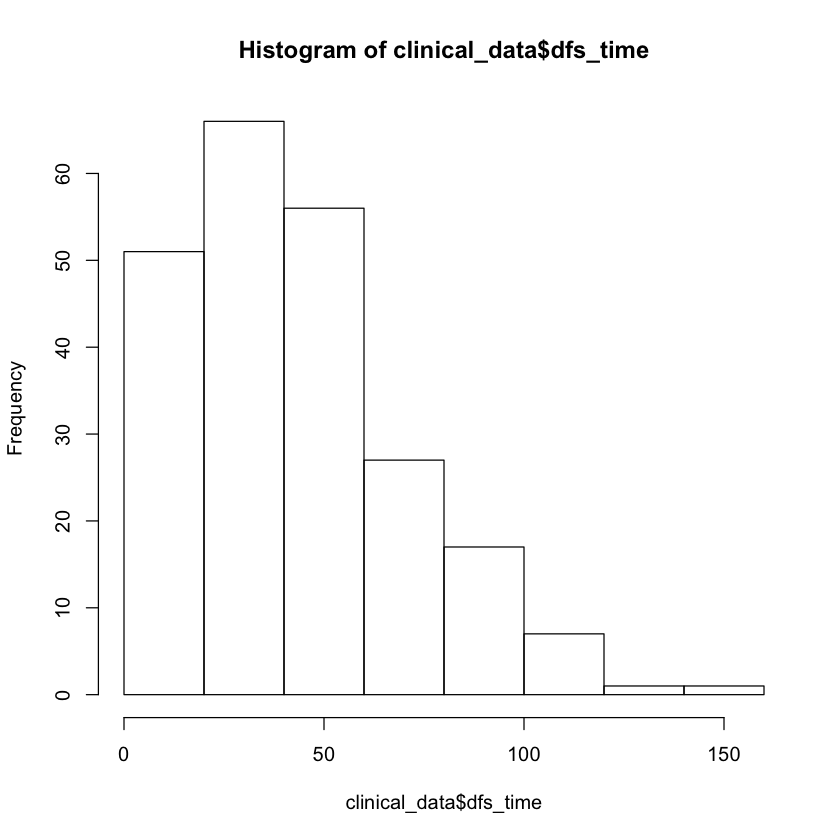

In [6]:
hist(clinical_data$dfs_time)

## Kaplan-Meier Estimate

In [7]:
library("survminer")
library("survival")
library("reshape2")

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: ggpubr
Loading required package: magrittr


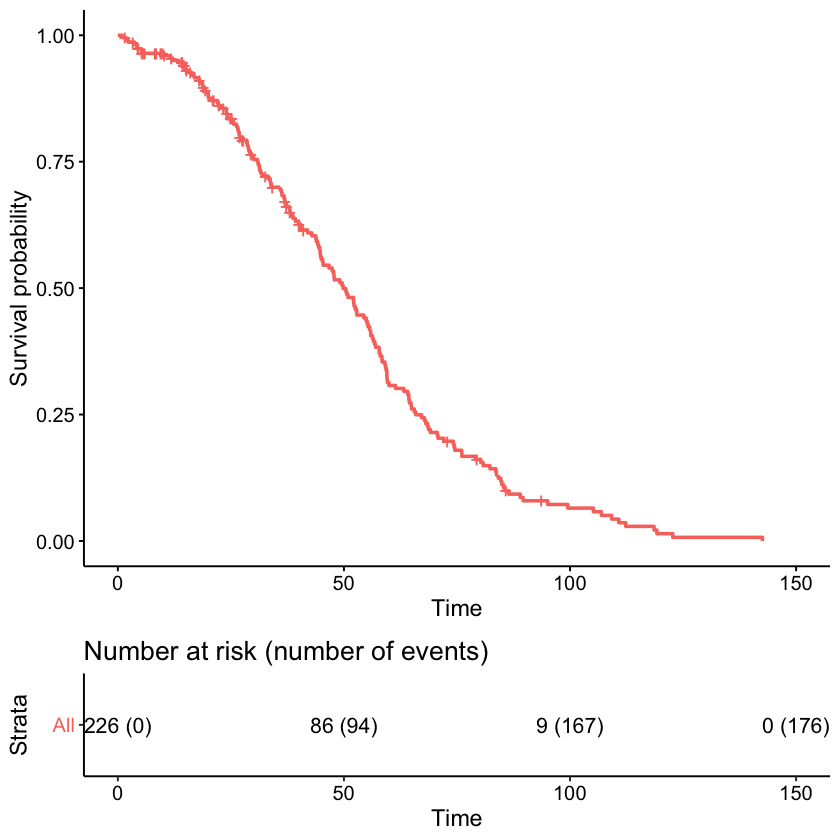

In [8]:
km = survfit(Surv(dfs_time, dfs_event) ~ 1, data=clinical_data)
ggsurvplot(km, conf.int=FALSE, risk.table="nrisk_cumevents", legend="none")

## Weibull Model

In [9]:
str(clinical_data)

'data.frame':	226 obs. of  9 variables:
 $ sampleID   : chr  "GSM358341" "GSM358342" "GSM358343" "GSM358344" ...
 $ location   : Factor w/ 4 levels "Rectum","Colon",..: 4 1 3 3 3 4 3 3 4 4 ...
 $ dukes_stage: Factor w/ 3 levels "A","B","C": 1 1 1 1 1 1 1 1 1 1 ...
 $ age_diag   : num  78 53 80 58 81 57 63 51 86 76 ...
 $ gender     : Factor w/ 2 levels "F","M": 2 1 1 2 2 2 1 2 1 2 ...
 $ dfs_time   : num  3.64 14.53 16.47 19.75 20.02 ...
 $ dfs_event  : num  1 0 1 1 1 1 0 1 1 1 ...
 $ adjXRT     : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ adjCTX     : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 2 1 1 ...


In [10]:
wm <-  survreg(Surv(dfs_time, dfs_event) ~ dukes_stage+age_diag, data=clinical_data)
surv <- seq(.99, .01, by = -.01)
newdata <- expand.grid(dukes_stage =levels(clinical_data$dukes_stage),
                     age_diag=quantile(clinical_data$age_diag, probs=c(0.25,0.50,0.75)))
t <- predict(wm, type="quantile", p=1-surv, newdata= newdata)
surv_wbmod_wide <- cbind(newdata, t)

In [12]:
head(surv_wbmod_wide)

dukes_stage,age_diag,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
A,58,6.598327,9.445450,11.663578,13.55721,15.24469,16.78683,18.21980,19.56718,...,107.63171,110.13446,112.87005,115.89743,119.30176,123.21319,127.84605,133.5942,141.3194,153.6736
B,58,5.344378,7.650433,9.447028,10.98079,12.34759,13.59666,14.75730,15.84863,...,87.17734,89.20447,91.42019,93.87224,96.62961,99.79771,103.55014,108.2059,114.4630,124.4694
C,58,5.913149,8.464623,10.452418,12.14941,13.66167,15.04367,16.32783,17.53530,...,96.45510,98.69796,101.14949,103.86250,106.91333,110.41858,114.57037,119.7216,126.6447,137.7160
A,67,6.158989,8.816541,10.886979,12.65453,14.22965,15.66911,17.00667,18.26434,...,100.46524,102.80135,105.35480,108.18060,111.35826,115.00925,119.33365,124.6990,131.9099,143.4415
B,67,4.988532,7.141043,8.818014,10.24966,11.52544,12.69135,13.77471,14.79338,...,81.37279,83.26494,85.33314,87.62192,90.19570,93.15286,96.65544,101.0012,106.8417,116.1818
C,67,5.519432,7.901021,9.756463,11.34047,12.75203,14.04201,15.24067,16.36775,...,90.03281,92.12634,94.41463,96.94700,99.79469,103.06656,106.94190,111.7501,118.2122,128.5464


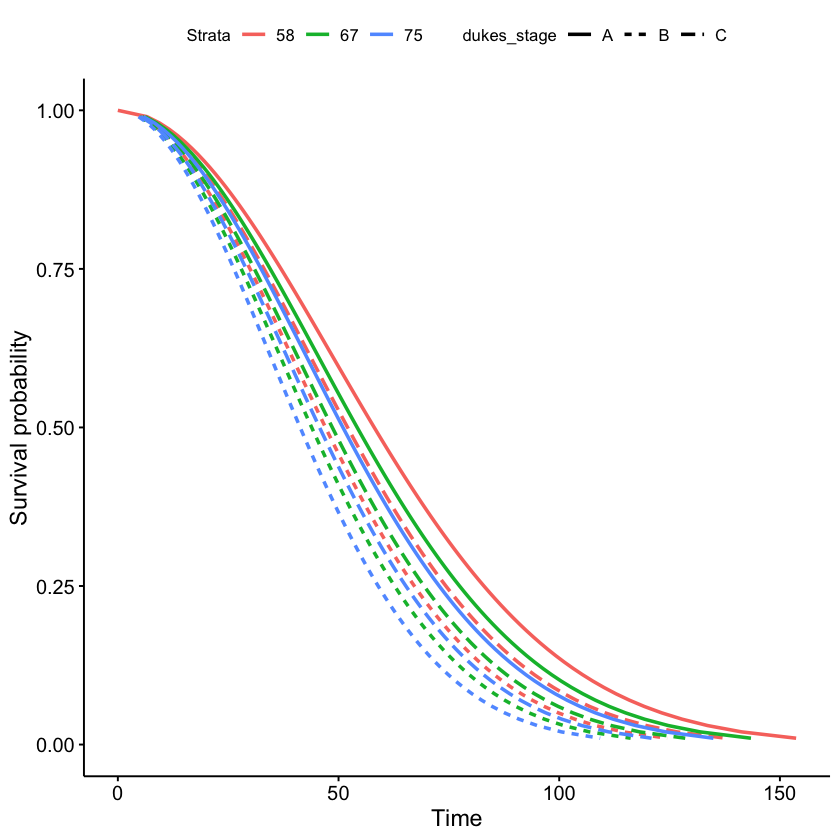

In [13]:
surv_wbmod <- melt(surv_wbmod_wide, id.vars = c("dukes_stage", "age_diag"),
                   variable.name = "surv_id", value.name = "time")
surv_wbmod$surv <- surv[as.numeric(surv_wbmod$surv_id)] 
surv_wbmod[, c("upper", "lower", "std.err", "strata")] <- NA
ggsurvplot_df(fit = surv_wbmod, surv.geom = geom_line, linetype = "dukes_stage", color = "age_diag")

## Cox Model

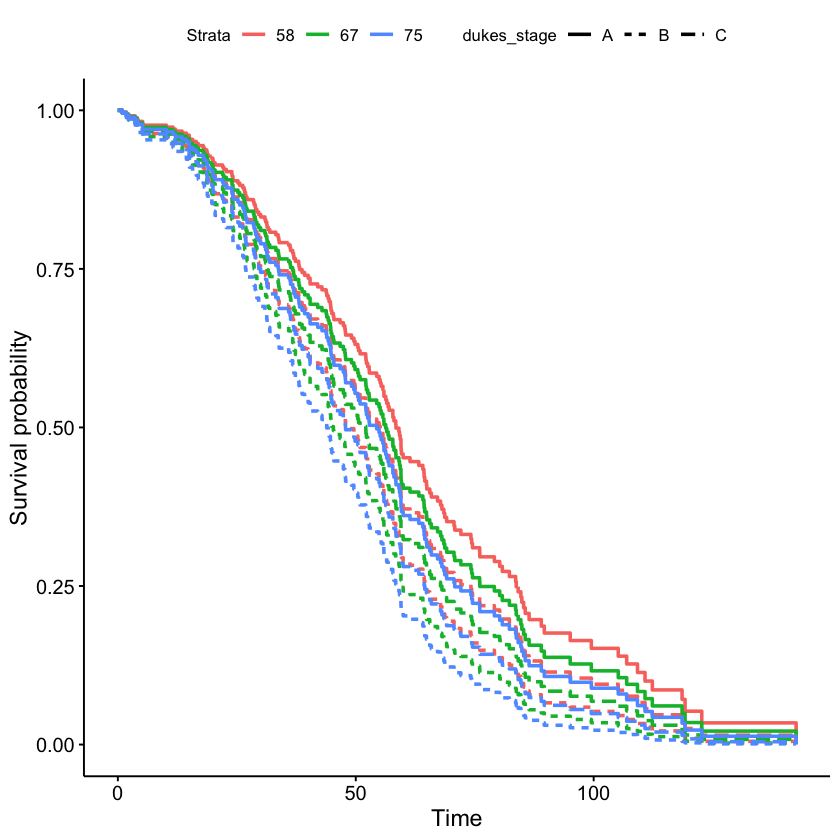

In [14]:
cox <-  coxph(Surv(dfs_time, dfs_event) ~ dukes_stage+age_diag, data=clinical_data)
surv <- seq(.99, .01, by = -.01)
newdata <- expand.grid(dukes_stage =levels(clinical_data$dukes_stage),
                     age_diag=quantile(clinical_data$age_diag, probs=c(0.25,0.50,0.75)))
cox_surv_temp <- survfit(cox, data=clinical_data, newdata= newdata, conf.type="none")
cox_surv <- surv_summary(cox_surv_temp)
cox_surv <- cbind(cox_surv, newdata[as.character(cox_surv$strata), ])
ggsurvplot_df(fit = cox_surv, linetype = "dukes_stage", color = "age_diag", censor=FALSE)